In [13]:

import pandas as pd
a1 = ['2008-07-23', '송중기', 88]
a2 = ['2008-09-21', '김나현', 72]
a3 = ['2008-05-06', '박효신', 78]
a4 = ['2008-03-05', '송중기', 93]
a5 = ['2008-08-13', '김나현', 91]
a6 = ['2008-12-24', '송중기', 85]
df = pd.DataFrame([a1, a2, a3, a4, a5, a6], columns=["생일", "이름", "점수"])
df["생일"] = pd.to_datetime(df["생일"])

df

,생일,이름,점수
0,2008-07-23,송중기,88
1,2008-09-21,김나현,72
2,2008-05-06,박효신,78
3,2008-03-05,송중기,93
4,2008-08-13,김나현,91
5,2008-12-24,송중기,85


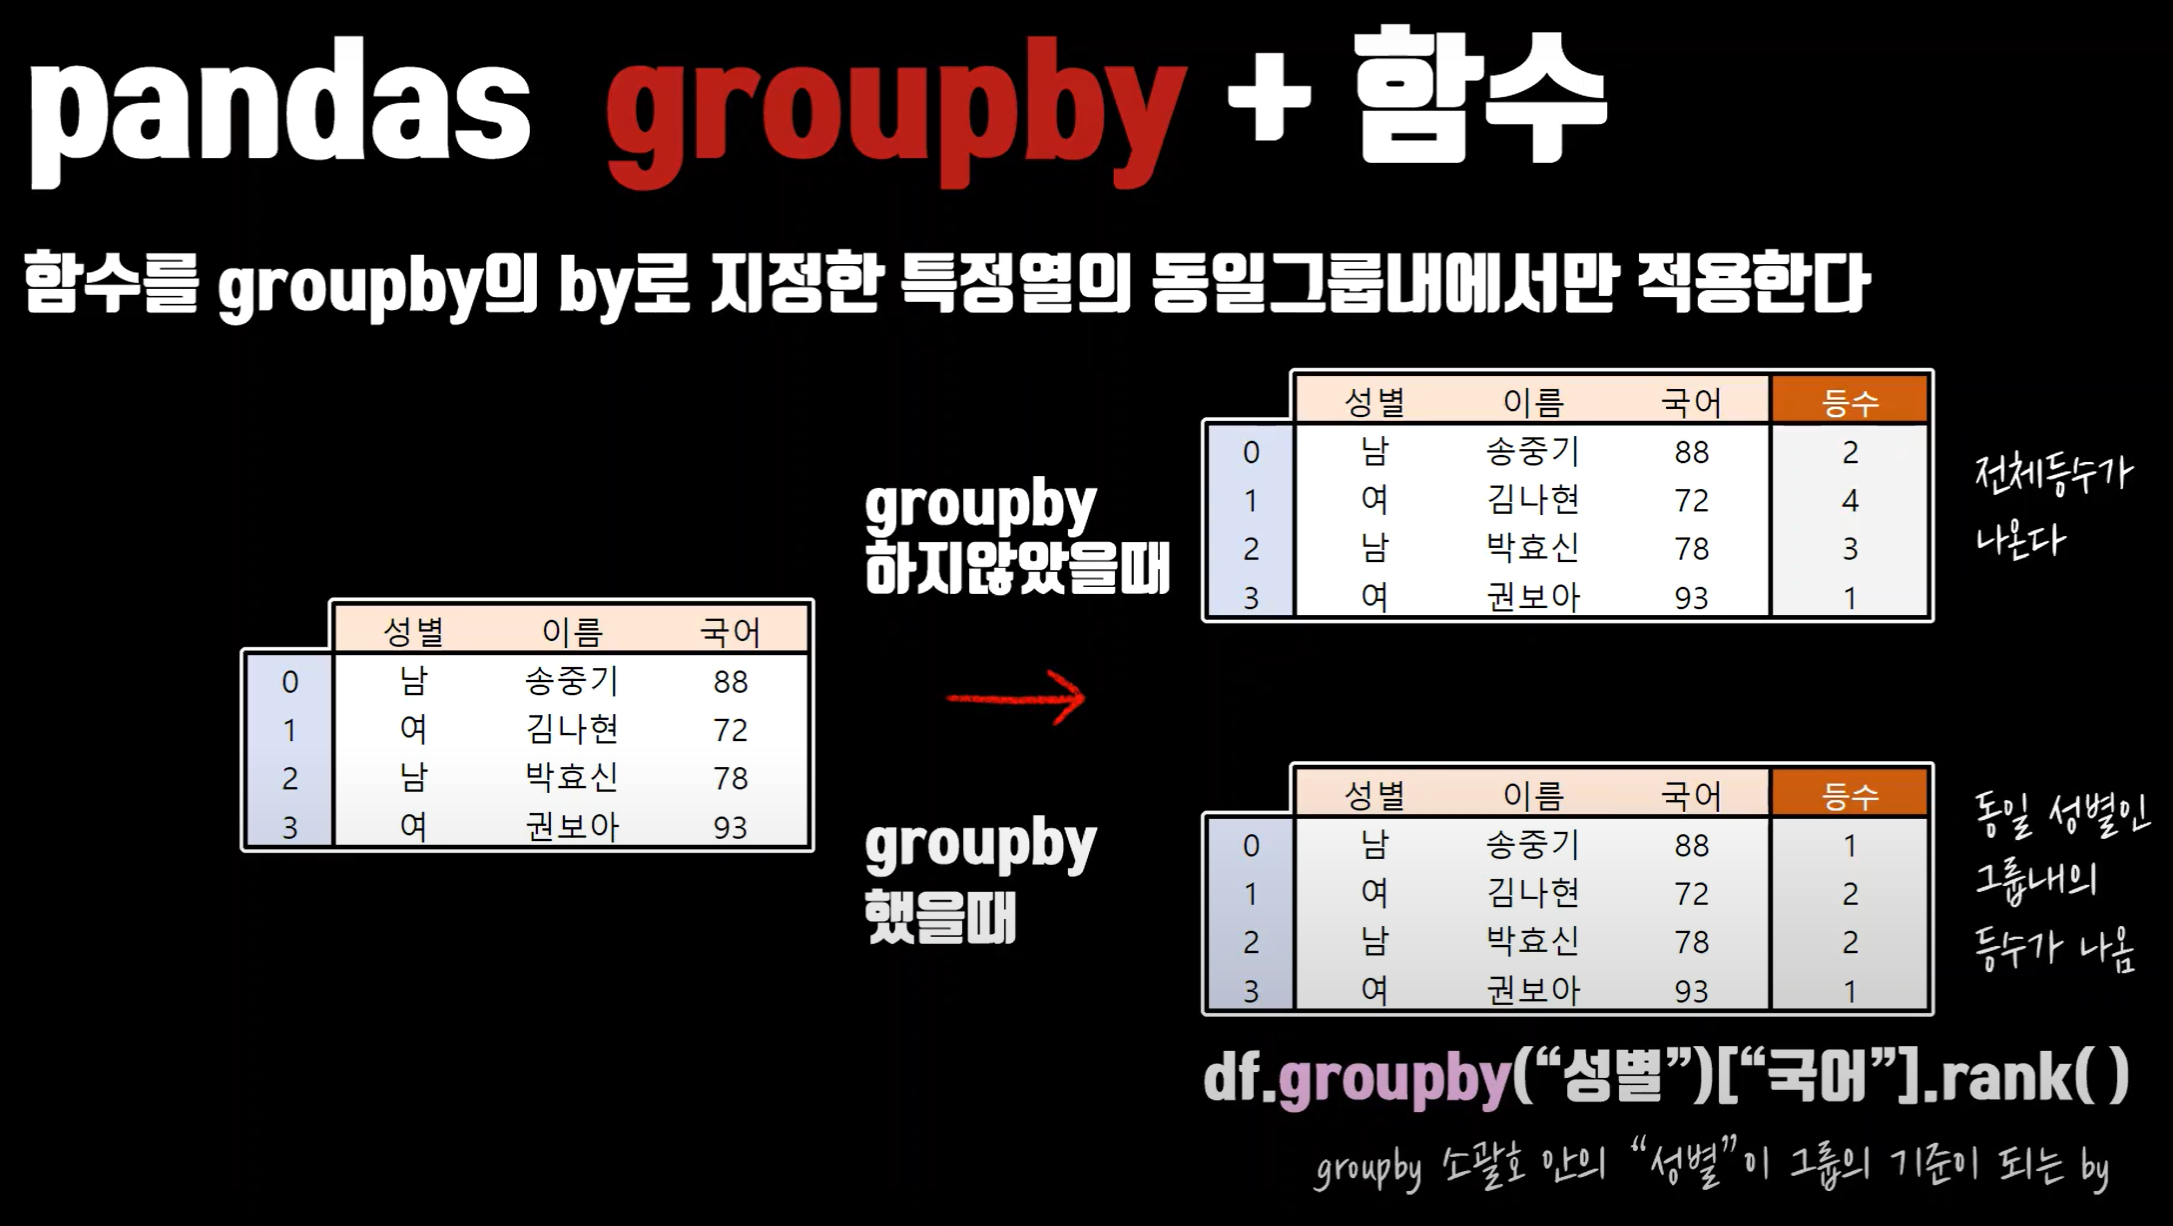

In [14]:
df["rank"] = df.groupby("이름")["생일"].rank()
df

,생일,이름,점수,rank
0,2008-07-23,송중기,88,2.0
1,2008-09-21,김나현,72,2.0
2,2008-05-06,박효신,78,1.0
3,2008-03-05,송중기,93,1.0
4,2008-08-13,김나현,91,1.0
5,2008-12-24,송중기,85,3.0


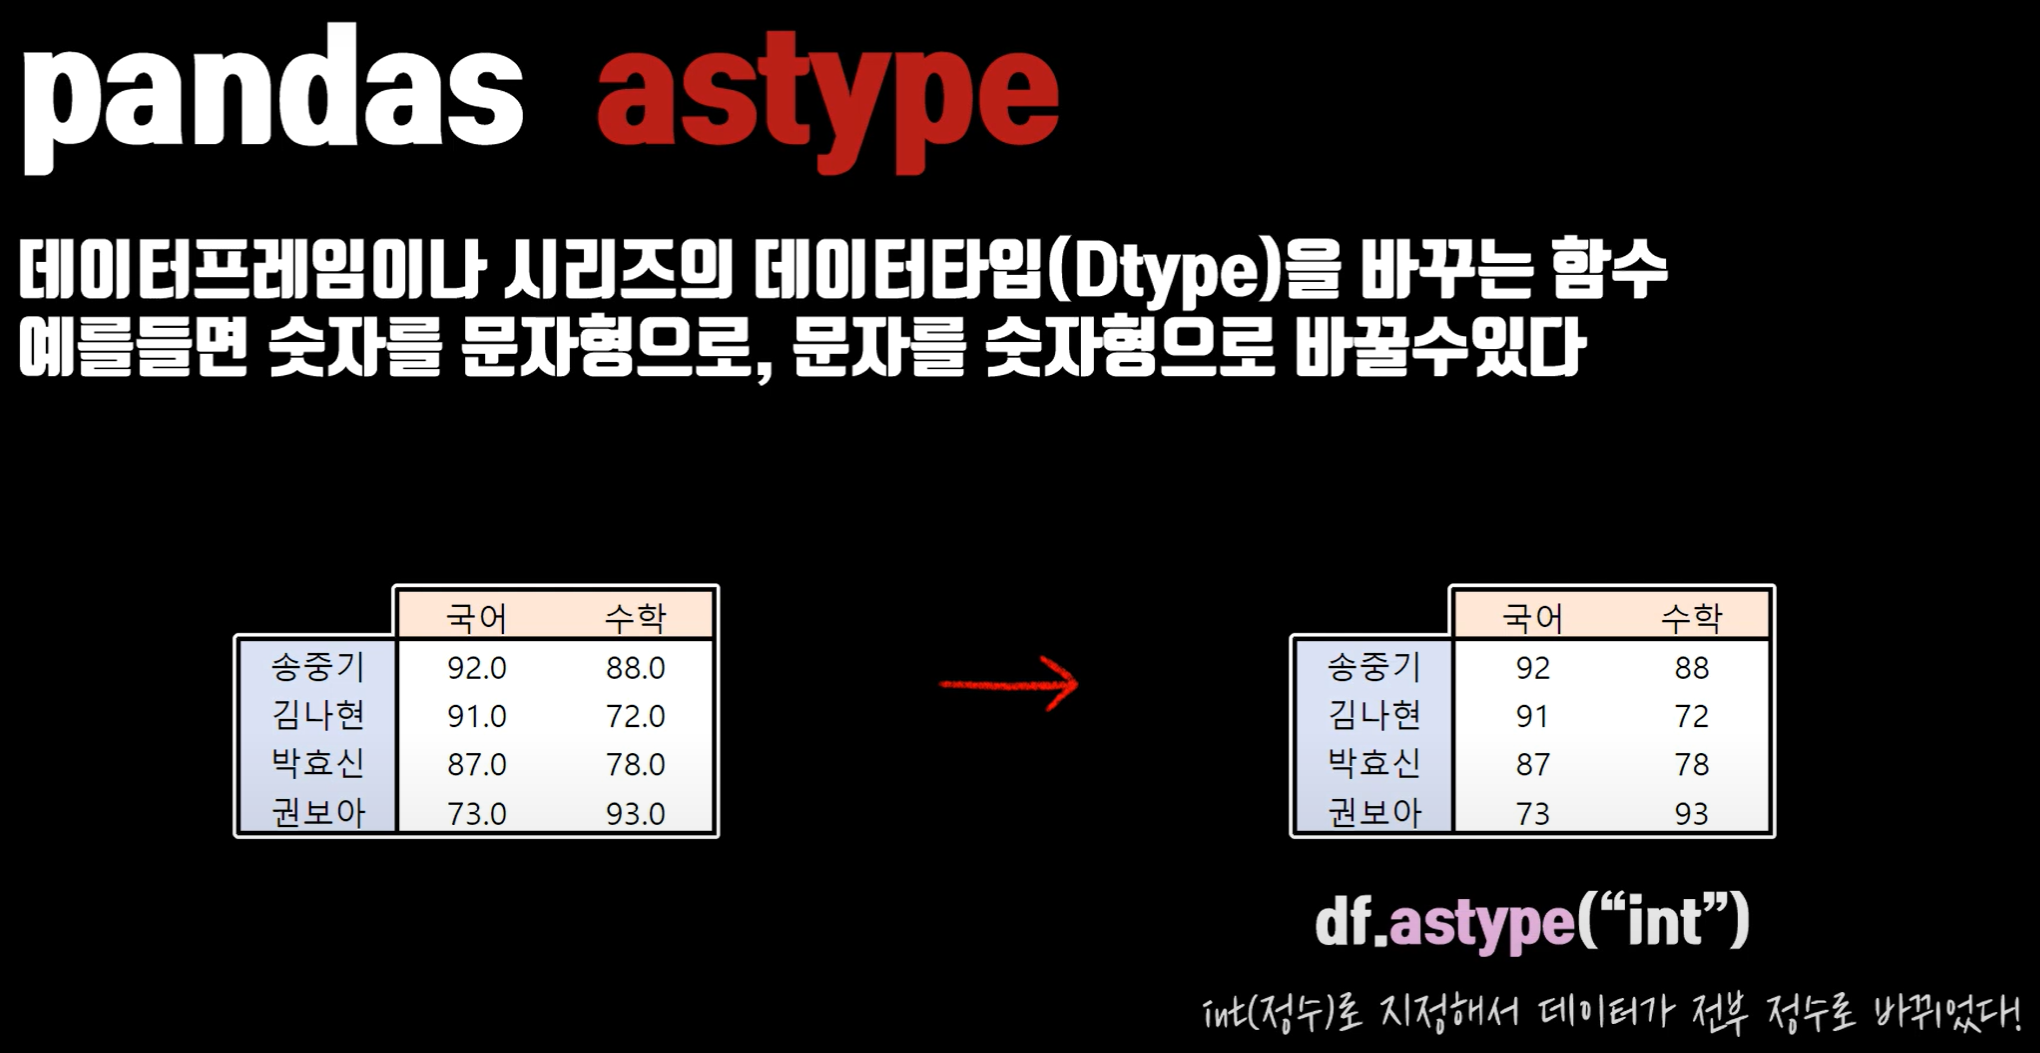

In [16]:
df["rank"].astype("int").astype("str")
# int 정수로 바꾸고 str 문자로 바꿈

0    2
1    2
2    1
3    1
4    1
5    3
Name: rank, dtype: object

In [17]:
df["rank문자"] = df["rank"].astype("int").astype("str")
df

,생일,이름,점수,rank,rank문자
0,2008-07-23,송중기,88,2.0,2
1,2008-09-21,김나현,72,2.0,2
2,2008-05-06,박효신,78,1.0,1
3,2008-03-05,송중기,93,1.0,1
4,2008-08-13,김나현,91,1.0,1
5,2008-12-24,송중기,85,3.0,3


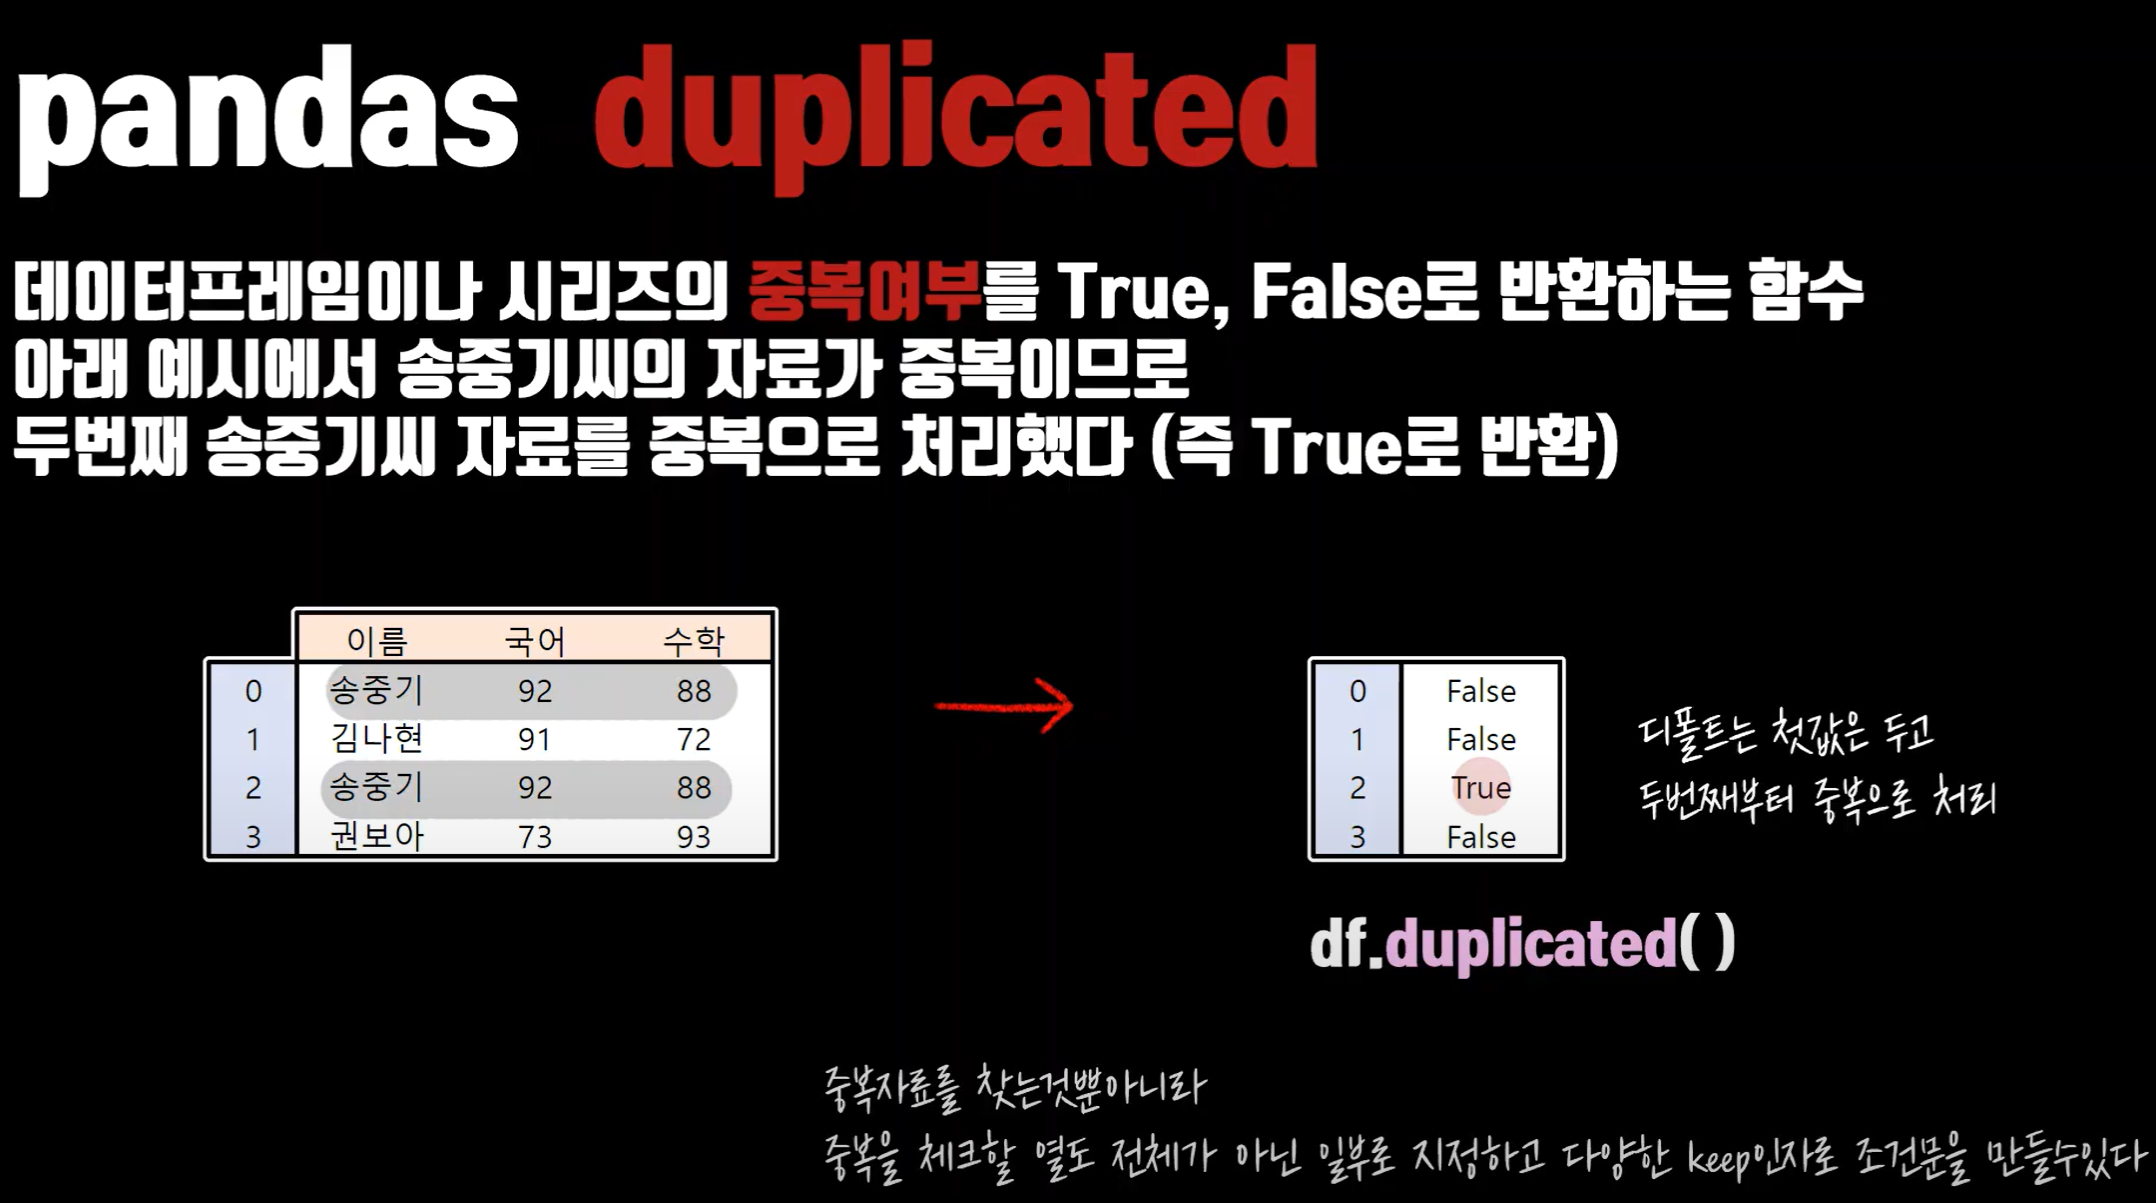

In [19]:
df.duplicated("이름", keep=False)

# keep="first" 중복값 처음만 true
# keep="last" 중복값 마지막 true
# keep=False 중복이면 모두 true

0     True
1     True
2    False
3     True
4     True
5     True
dtype: bool

In [20]:
df["dup"] = df.duplicated("이름", keep=False)
df

,생일,이름,점수,rank,rank문자,dup
0,2008-07-23,송중기,88,2.0,2,True
1,2008-09-21,김나현,72,2.0,2,True
2,2008-05-06,박효신,78,1.0,1,False
3,2008-03-05,송중기,93,1.0,1,True
4,2008-08-13,김나현,91,1.0,1,True
5,2008-12-24,송중기,85,3.0,3,True


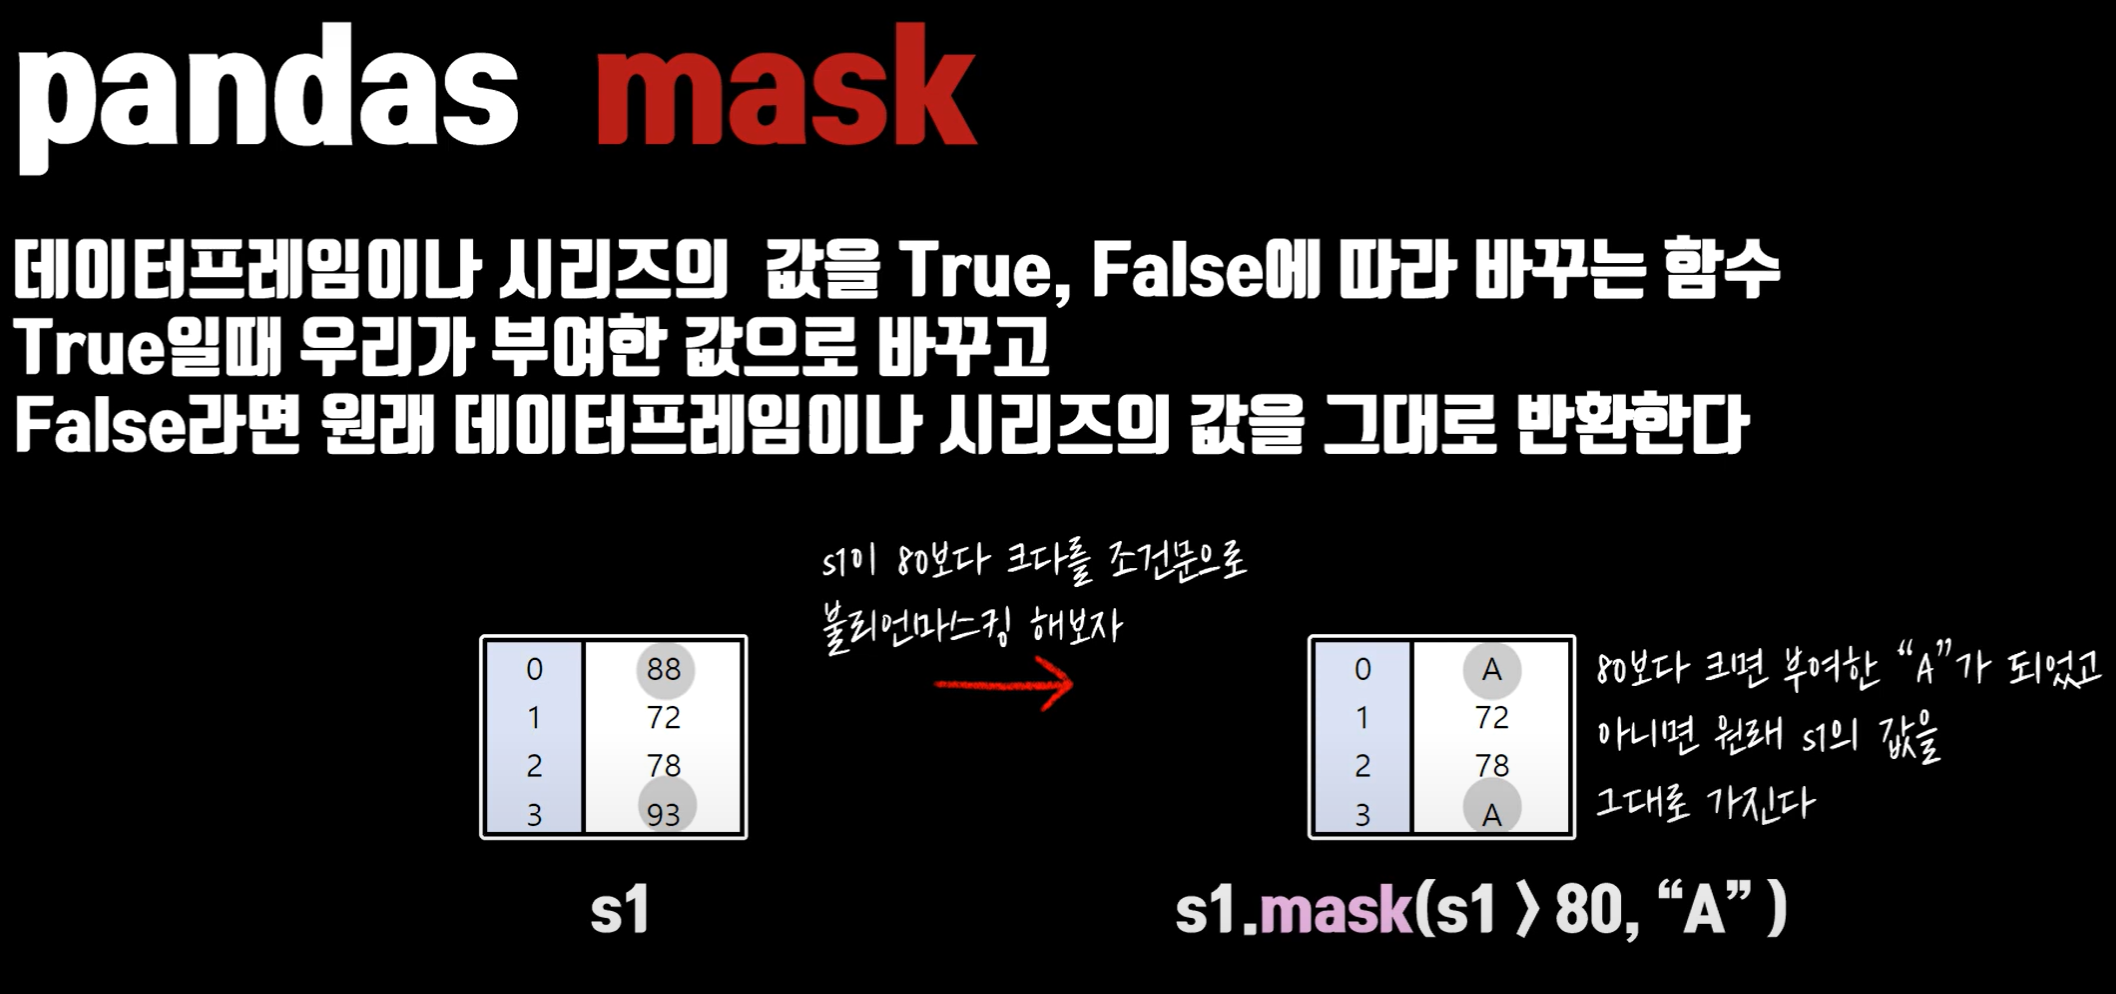

In [22]:
df["이름2"] = df["이름"].mask(df["dup"], df["이름"] + df["rank문자"])
df

,생일,이름,점수,rank,rank문자,dup,이름2
0,2008-07-23,송중기,88,2.0,2,True,송중기2
1,2008-09-21,김나현,72,2.0,2,True,김나현2
2,2008-05-06,박효신,78,1.0,1,False,박효신
3,2008-03-05,송중기,93,1.0,1,True,송중기1
4,2008-08-13,김나현,91,1.0,1,True,김나현1
5,2008-12-24,송중기,85,3.0,3,True,송중기3


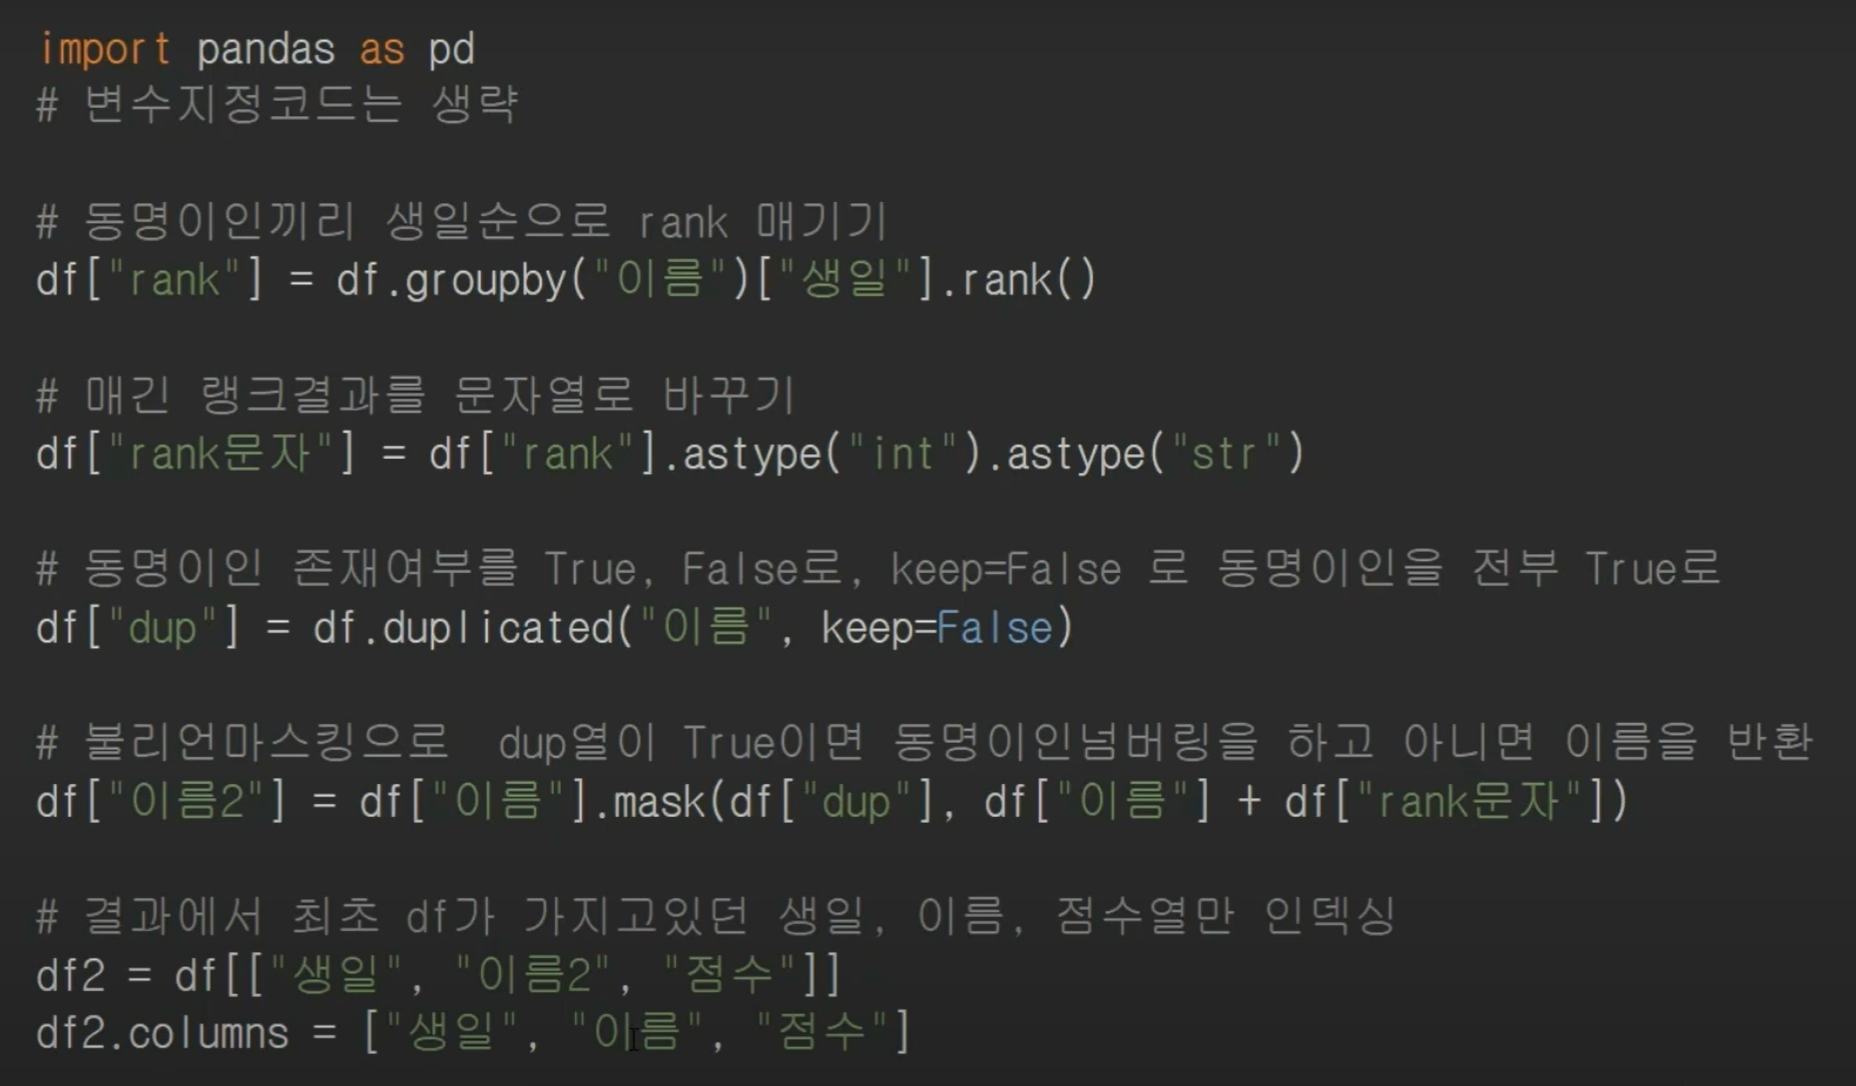